<a href="https://colab.research.google.com/github/WaleedAhmed565/Ai-lab1/blob/main/medical_xg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install xgboost openpyxl


In [2]:
from google.colab import files
uploaded = files.upload()


Saving dataset_analysis_v1 updated.xlsx to dataset_analysis_v1 updated.xlsx


In [3]:
import pandas as pd

# Load Excel file (Sheet1)
df = pd.read_excel('dataset_analysis_v1 updated.xlsx', sheet_name='Sheet1')

# Show basic info
print("✅ Dataset Loaded. Sample:")
df.head()


✅ Dataset Loaded. Sample:


,Sex,Age,Smoking,Corona Vaccine,Systolic B.P (mm Hg),Diastolic B.P (mm Hg),Fasting Blood Sugar (mg/dL),Random Blood Sugar,Hypertension,Trop-I,...,COPD,Pneumnia,Bronchitis,TB,PM10,NO2,SO2,Ozone,PM2.5,Affected
0,0,70,0,1,80,50,80,166,1,647.0,...,0,0,0,0,225.67,47.09,76.78,49.34,20.8,0
1,0,60,0,0,130,90,80,120,0,219.0,...,0,0,0,0,240.88,52.83,79.45,51.99,21.5,0
2,0,45,0,1,140,80,152,246,0,398.0,...,1,0,0,0,250.87,55.67,82.10,56.34,22.4,0
3,0,55,0,1,140,90,80,120,1,455.0,...,0,0,0,0,268.76,57.86,84.87,58.10,23.9,0
4,1,60,0,0,150,90,80,83,0,130.0,...,0,0,0,0,268.76,57.86,84.87,58.10,23.9,0


In [4]:
# Split features and label
X = df.drop('Affected', axis=1)
y = df['Affected']


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    learning_rate=0.1,
    max_depth=5,
    n_estimators=200,
    random_state=42
)

xgb.fit(X_train_scaled, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [17:27:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = xgb.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy on Test Set: {accuracy * 100:.2f}%")

# Classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



✅ Accuracy on Test Set: 75.00%

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.80      0.50      0.62         8

    accuracy                           0.75        20
   macro avg       0.77      0.71      0.72        20
weighted avg       0.76      0.75      0.74        20


🧮 Confusion Matrix:
[[11  1]
 [ 4  4]]


/tmp/ipython-input-10-1476053577.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


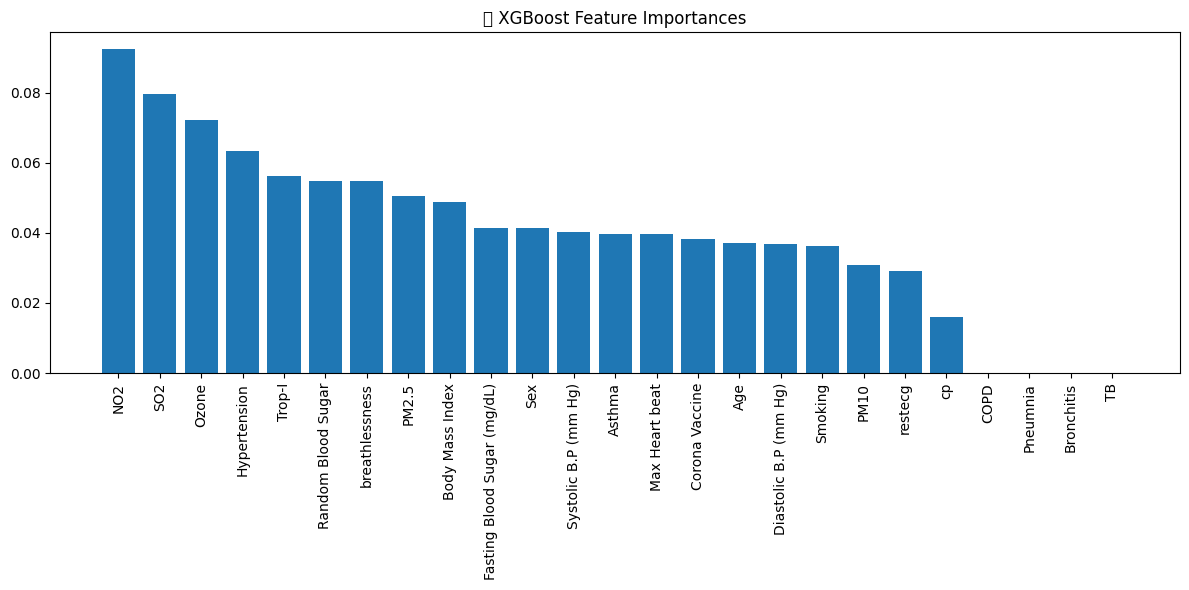

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = xgb.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(12, 6))
plt.title("🔍 XGBoost Feature Importances")
plt.bar(range(len(features)), importances[indices])
plt.xticks(range(len(features)), features[indices], rotation=90)
plt.tight_layout()
plt.show()
